# Interpolants Stochastiques, Équations Différentielles Ordinaires (ODE) et Stochastiques (SDE)  
references:
https://arxiv.org/abs/2303.08797  
https://github.com/malbergo/stochastic-interpolants

---

## Introduction aux Interpolants Stochastiques

Les interpolants stochastiques sont utilisés pour construire des modèles génératifs qui interpolent entre deux distributions de probabilité. Ils utilisent des processus stochastiques pour transformer une distribution simple (comme une distribution gaussienne) en une distribution cible plus complexe.

### Définition

Un interpolant stochastique $ x_t $ entre deux densités de probabilité $ \rho_0 $ et $ \rho_1 $ est défini par :

$$
x_t = I(t, x_0, x_1) + \gamma(t) z
$$

où :
- $ I(t, x_0, x_1) $ est une fonction d'interpolation satisfaisant les conditions suivantes :
$$
I \in C^2([0, 1]; (C^2(\mathbb{R}^d \times \mathbb{R}^d))^d),
$$
avec les conditions aux limites $ I(0, x_0, x_1) = x_0 $ et $ I(1, x_0, x_1) = x_1 $, ainsi que l'estimation $ \exists C_1 < \infty : |\partial_t I(t, x_0, x_1)| \leq C_1 |x_0 - x_1| $ pour tout $ (t, x_0, x_1) \in [0, 1] \times \mathbb{R}^d \times \mathbb{R}^d $.
- $ (x_0, x_1) \sim \nu $, $ \nu $ étant une distribution particulière définie par $ \nu(dx_0, dx_1) = \rho_0(x_0) dx_0 \cdot \rho_1(x_1) dx_1 $.
- $ \gamma(t) $ est une fonction positive $ C^2([0, 1]) $ telle que $ \gamma(0) = \gamma(1) = 0 $.
- $ z $ est une variable latente, typiquement gaussienne et indépendante de $ (x_0, x_1) $, i.e., $ z \sim N(0, I_d) $ et $ z \perp (x_0, x_1) $.



Ces conditions définissent les paramètres et les propriétés fondamentales des interpolants stochastiques, qui permettent de générer des échantillons approximatifs à partir de $ \rho_0 $ vers $ \rho_1 $ en utilisant des processus stochastiques contrôlés.

---



## Équations de Transport, Score et Objectifs Quadratiques

L'interpolant permet de définir des équations de transport qui déplacent les échantillons de $\rho_0$ vers $\rho_1$. Les propriétés de la distribution de probabilité de l'interpolant stochastique $x_t$ sont spécifiées par le théorème suivant :

**Théorème  (Propriétés de l'interpolant stochastique) :** La distribution de probabilité de l'interpolant stochastique $ x_t $ défini par

$$
x_t = I(t, x_0, x_1) + \gamma(t) z
$$

est absolument continue par rapport à la mesure de Lebesgue à tout instant $ t \in [0, 1] $ et sa densité dépendant du temps $ \rho(t) $ satisfait $ \rho(0) = \rho_0 $, $ \rho(1) = \rho_1 $, $\rho \in C^1([0, 1]; C^p(\mathbb{R}^d))$ pour tout $ p \in \mathbb{N} $, et $ \rho(t, x) > 0 $ pour tout $ (t, x) \in [0, 1] \times \mathbb{R}^d $. En plus, $ \rho $ résout l'équation de transport :

$$
\partial_t \rho + \nabla \cdot (b\rho) = 0,
$$

où la vitesse $ b $ est définie par :

$$
b(t, x) = \mathbb{E}[\dot{x}_t | x_t = x] = \mathbb{E}[\partial_t I(t, x_0, x_1) + \dot{\gamma}(t)z | x_t = x].
$$

Cette vitesse est en $ C^0([0, 1]; (C^p(\mathbb{R}^d))^d) $ pour tout $ p \in \mathbb{N} $, et telle que :

$$
\forall t \in [0, 1] : \int_{\mathbb{R}^d} |b(t, x)|^2 \rho(t, x) dx < \infty.
$$

L'équation de transport peut être résolue soit en avant dans le temps à partir de la condition initiale $ \rho(0) = \rho_0 $, auquel cas $ \rho(1) = \rho_1 $, soit en arrière dans le temps à partir de la condition finale $ \rho(1) = \rho_1 $, auquel cas $ \rho(0) = \rho_0 $.


Il suffit alors de connaître la vitesse b pour pouvoir résoudre l'équation de transport et pouvoir retrouver la densité $\rho_1$.
### Objectif Quadratique

La vitesse $ b $ définie ci-dessus est l'unique minimiseur dans $ C^0([0, 1]; (C^1(\mathbb{R}^d))^d) $ de l'objectif quadratique suivant :

$$
L_b[\hat{b}] = \int_0^1 \mathbb{E}\left[\frac{1}{2}|\hat{b}(t, x_t)|^2 - (\partial_t I(t, x_0, x_1) + \dot{\gamma}(t)z) \cdot \hat{b}(t, x_t)\right] dt,
$$

où $ x_t $ est défini par :

$$
x_t = I(t, x_0, x_1) + \gamma(t) z,
$$

et l'espérance est prise indépendamment sur $ (x_0, x_1) \sim \nu $ et $ z \sim N(0, I_d) $.


On peut alors estimer cette vitesse b en utilisant un réseau de neuronnes classiques en définissant la loss ci-dessus ce qui nous donne un premier moyen en partant d'une densité $\rho_0$ d'atteindre $\rho_1$.


On définit dans la suite la fonction de score fortement lié à la densité $\rho$ de notre interpolant $x_t$ fort utile en pratique.



### Score

Le score de la densité de probabilité $ \rho $ est donné par :

$$
s(t, x) = \nabla \log \rho(t, x) = -\gamma^{-1}(t) \mathbb{E}(z | x_t = x),
$$

et satisfait :

$$
\forall t \in [0, 1] : \int_{\mathbb{R}^d} |s(t, x)|^2 \rho(t, x) dx < \infty.
$$

Il est l'unique minimiseur dans $ C^1([0, 1]; (C^1(\mathbb{R}^d))^d) $ de l'objectif quadratique suivant :

$$
L_s[\hat{s}] = \int_0^1 \mathbb{E}\left[\frac{1}{2}|\hat{s}(t, x_t)|^2 + \gamma^{-1} z \cdot \hat{s}(t, x_t)\right] dt.
$$

On peut donc également estimer le score par un réseau de neuronnes en utilisant la loss définit ci-dessus.

### Lien entre le Score et la fonction de Denoising

Le score de la densité de probabilité $\rho$ peut également être lié à une fonction de denoising $\eta_z(t, x)$ qui est définit comme:

$$
\eta_z(t, x) = \mathbb{E}[z | x_t = x],
$$

ce qui implique :

$$
s(t, x) = -\gamma^{-1}(t) \eta_z(t, x).
$$


Ce denoiser est le minimiseur d'une expression équivalente à l'objectif quadratique pour le score, donné par :

$$
\mathcal{L}_{\eta_z}\left[\hat{\eta}_z\right]=\int_0^1 \overline{\mathbb{E}}\left(\frac{1}{2}\left|\hat{\eta}_z\left(t, x_t\right)\right|^2 - z \cdot \hat{\eta}_z\left(t, x_t\right)\right) dt
$$

Le denoiser $\eta_z$ est utile pour les réalisations numériques. En particulier, l'objectif dans l'équation ci-dessus est plus facile à utiliser que celui de l'objectif quadratique pour le score car il ne contient pas le facteur $\gamma^{-1}(t)$, qui nécessite une manipulation minutieuse lorsque $t$ approche de 0 et 1.
### Équations de Fokker-Planck

Avoir accès au score permet immédiatement de réécrire l'équation de transport (2.9) sous forme d'équations de Fokker-Planck avant et arrière, que nous énonçons comme suit :

**Corollaire  (Équations de Fokker-Planck)** : Pour tout $\epsilon \in C^0([0, 1])$ avec $\epsilon(t) \geq 0$ pour tout $t \in [0, 1]$, la densité de probabilité $\rho$ spécifiée dans le Théorème 2.6 satisfait :

1. L'équation de Fokker-Planck avant :
$$
\partial_t \rho + \nabla \cdot (b_F \rho) = \epsilon(t) \Delta \rho, \quad \rho(0) = \rho_0, \tag{1}
$$
où le drift avant est défini par
$$
b_F(t, x) = b(t, x) + \epsilon(t) s(t, x). \tag{1.1}
$$
L'équation (1) est bien posée lorsqu'elle est résolue vers l'avant dans le temps de $t = 0$ à $t = 1$, et sa solution pour la condition initiale $\rho(t = 0) = \rho_0$ satisfait $\rho(t = 1) = \rho_1$.

2. L'équation de Fokker-Planck arrière :
$$
\partial_t \rho + \nabla \cdot (b_B \rho) = -\epsilon(t) \Delta \rho, \quad \rho(1) = \rho_1, \tag{2}
$$
où le drift arrière est défini par
$$
b_B(t, x) = b(t, x) - \epsilon(t) s(t, x). \tag{2.1}
$$
L'équation (2) est bien posée lorsqu'elle est résolue vers l'arrière dans le temps de $t = 1$ à $t = 0$, et sa solution pour la condition finale $\rho(t = 1) = \rho_1$ satisfait $\rho(t = 0) = \rho_0$.



Ce corollaire est très utile en pratique pour concevoir des modèles génératifs basés sur des équations différentielles stochastiques avant et arrière.


## Modèles Génératifs
Les modèles génératifs basés sur les interpolants stochastiques consistent à échantillonner à partir de $\rho_0$ et à transformer ces échantillons via le processus d'interpolant pour approcher $\rho_1$.


Les résultats suivants découlent directement du Théorème, et il montre comment concevoir des modèles génératifs en utilisant les processus stochastiques associés à l'Équation de Transport , l'Équation de Fokker-Planck avant (1), et l'Équation de Fokker-Planck arrière (2) :

**Modèles génératifs** : À tout instant $ t \in [0, 1] $, la loi de l'interpolant stochastique $ X_t $ coïncide avec la loi des trois processus $ X_t $, $ X^{F}_t $ et $ X^{B}_t $, respectivement définis comme suit :

1. Les solutions du flux de probabilité associé à l'équation de transport :
$$
\frac{d}{dt} X_t = b(t, X_t), \quad x_{t=0} \sim \rho_0, \tag{3}
$$
résolues soit vers l'avant à partir des données initiales $ X_{t=0} \sim \rho_0 $, soit vers l'arrière à partir des données finales $ X_{t=1} = x_1 \sim \rho_1 $.

2. Les solutions de l'EDS forward associées à l'Équation de Fokker-Planck avant (1) :
$$
d X^{F}_t = b_F(t, X^{F}_t) dt + \sqrt{2 \epsilon(t)} dW_t, \quad X^{F}_{t=0} \sim \rho_0 \text{ indépendant de } W. \tag{4}
$$
   
3. Les solutions de l'EDS backward associées à l'Équation de Fokker-Planck arrière (2) :
$$
d X^{B}_t = b_B(t, X^{B}_t) dt + \sqrt{2 \epsilon(t)} dW^{B}_t, \quad W^{B}_t = -W_{1-t}, \quad X^{B}_{t=1} \sim \rho_1 \text{ indépendant de } W_B, \tag{5}
$$
où la solution de cette équation est par définition  $X^{B}_t = z^{F}_{1-t} $, avec $ z^{F}_t $ satisfaisant
$$
d z^{F}_t = - b_B(1 - t, z^{F}_t) dt + \sqrt{2 \epsilon(t)} dW_t,
$$
résolue vers l'avant à partir des données initiales $ z^{F}_{t=0} \sim \rho_1 $ indépendamment de $ W $.


Ce résultat permet une modélisation générative très simple. En supposant, par exemple, que $ \rho_0 $ est une densité simple qui peut être échantillonnée facilement (par exemple, une densité gaussienne ou une densité de mélange gaussien), nous pouvons utiliser l'ODE (3) ou l'EDS (4) pour propager ces échantillons dans le temps et générer des échantillons à partir d'une densité cible complexe $ \rho_1 $.

Nous soulignons que l'interpolant stochastique $ x_t $, la solution $ X_t $ de l'ODE (3), et les solutions $ X^{F}_t $ et $ X^{B}_t $ des EDS forward et backward (4) et (5) sont différents processus stochastiques, mais leurs lois coïncident toutes avec $ \rho(t) $ à tout instant $ t \in [0, 1] $. C'est tout ce qui importe lors de l'application de ces processus en tant que modèles génératifs. Cependant, le fait que ces processus soient différents a des implications sur la précision de l'intégration numérique utilisée pour échantillonner à partir d'eux à tout $ t $, ainsi que sur la propagation des erreurs statistiques.

Les modèles génératifs basés sur les solutions $ X_t $ de l'ODE (3), les solutions $ X^{F}_t $ de l'EDS forward (4), et les solutions $ X^{B}_t $ de l'EDS backward (5) impliqueront généralement des dérives $ b $, $ b_F $ et $ b_B $ qui sont, en pratique, estimées imparfaitement via la minimisation des quantités définies plus haut sur des ensembles de données finis. Il est important d'estimer comment cette erreur d'estimation statistique se propage aux erreurs de qualité des échantillons, et comment la propagation de l'erreur dépend du modèle génératif utilisé.

Nous pourrons étudier alors s'il est préférable de sampler avec des ODE ou plutôt des SDE.






In [3]:
!pip install torchdiffeq

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [5]:
import torch
from torchdiffeq import odeint_adjoint as odeint
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

Velocity = torch.nn.Module



def make_It(path='linear', gamma = None, gamma_dot = None, gg_dot = None):
    """gamma function must be specified if using the trigonometric interpolant"""

    if path == 'linear':

        a      = lambda t: (1-t)
        adot   = lambda t: -1.0
        b      = lambda t: t
        bdot   = lambda t: 1.0
        It   = lambda t, x0, x1: a(t)*x0 + b(t)*x1
        dtIt = lambda t, x0, x1: adot(t)*x0 + bdot(t)*x1

    elif path == 'trig':
        if gamma == None:
            raise TypeError("Gamma function must be provided for trigonometric interpolant!")
        a    = lambda t: torch.sqrt(1 - gamma(t)**2)*torch.cos(0.5*math.pi*t)
        b    = lambda t: torch.sqrt(1 - gamma(t)**2)*torch.sin(0.5*math.pi*t)
        adot = lambda t: -gg_dot(t)/torch.sqrt(1 - gamma(t)**2)*torch.cos(0.5*math.pi*t) \
                                - 0.5*math.pi*torch.sqrt(1 - gamma(t)**2)*torch.sin(0.5*math.pi*t)
        bdot = lambda t: -gg_dot(t)/torch.sqrt(1 - gamma(t)**2)*torch.sin(0.5*math.pi*t) \
                                + 0.5*math.pi*torch.sqrt(1 - gamma(t)**2)*torch.cos(0.5*math.pi*t)

        It   = lambda t, x0, x1: a(t)*x0 + b(t)*x1
        dtIt = lambda t, x0, x1: adot(t)*x0 + bdot(t)*x1

    elif path == 'encoding-decoding':

        a    = lambda t: torch.where(t <= 0.5, torch.cos(math.pi*t)**2, torch.tensor(0.))
        adot = lambda t: torch.where(t <= 0.5, -2*math.pi*torch.cos(math.pi*t)*torch.sin(math.pi*t), torch.tensor(0.))
        b    = lambda t: torch.where(t > 0.5,  torch.cos(math.pi*t)**2, 0.)
        bdot = lambda t: torch.where(t > 0.5,  -2*math.pi*torch.cos(math.pi*t)*torch.sin(math.pi*t), torch.tensor(0.))
        It   = lambda t, x0, x1: a(t)*x0 + b(t)*x1
        dtIt = lambda t, x0, x1: adot(t)*x0 + bdot(t)*x1

    elif path == 'one-sided-linear':

        a      = lambda t: (1-t)
        adot   = lambda t: -1.0
        b      = lambda t: t
        bdot   = lambda t: 1.0

        It   = lambda t, x0, x1: a(t)*x0 + b(t)*x1
        dtIt = lambda t, x0, x1: adot(t)*x0 + bdot(t)*x1

    elif path == 'one-sided-trig':

        a      = lambda t: torch.cos(0.5*math.pi*t)
        adot   = lambda t: -0.5*math.pi*torch.sin(0.5*math.pi*t)
        b      = lambda t: torch.sin(0.5*math.pi*t)
        bdot   = lambda t: 0.5*math.pi*torch.cos(0.5*math.pi*t)


        It   = lambda t, x0, x1: a(t)*x0 + b(t)*x1
        dtIt = lambda t, x0, x1: adot(t)*x0 + bdot(t)*x1

    elif path == 'mirror':
        if gamma == None:
            raise TypeError("Gamma function must be provided for mirror interpolant!")

        a     = lambda t: gamma(t)
        adot  = lambda t: gamma_dot(t)
        b     = lambda t: torch.tensor(1.0)
        bdot  = lambda t: torch.tensor(0.0)

        It    = lambda t, x0, x1: b(t)*x1 + a(t)*x0
        dtIt  = lambda t, x0, x1: adot(t)*x0

    elif path == 'custom':
        return None, None, None

    else:
        raise NotImplementedError("The interpolant you specified is not implemented.")


    return It, dtIt, (a, adot, b, bdot)


def make_gamma(gamma_type = 'brownian', aval = None):
    """
    returns callable functions for gamma, gamma_dot,
    and gamma(t)*gamma_dot(t) to avoid numerical divide by 0s,
    e.g. if one is using the brownian (default) gamma.
    """
    if gamma_type == 'brownian':
        gamma = lambda t: torch.sqrt(t*(1-t))
        gamma_dot = lambda t: (1/(2*torch.sqrt(t*(1-t)))) * (1 -2*t)
        gg_dot = lambda t: (1/2)*(1-2*t)

    elif gamma_type == 'a-brownian':
        gamma = lambda t: torch.sqrt(a*t*(1-t))
        gamma_dot = lambda t: (1/(2*torch.sqrt(a*t*(1-t)))) * a*(1 -2*t)
        gg_dot = lambda t: (a/2)*(1-2*t)

    elif gamma_type == 'zero':
        gamma = gamma_dot = gg_dot = lambda t: torch.zeros_like(t)

    elif gamma_type == 'bsquared':
        gamma = lambda t: t*(1-t)
        gamma_dot = lambda t: 1 -2*t
        gg_dot = lambda t: gamma(t)*gamma_dot(t)

    elif gamma_type == 'sinesquared':
        gamma = lambda t: torch.sin(math.pi * t)**2
        gamma_dot = lambda t: 2*math.pi*torch.sin(math.pi * t)*torch.cos(math.pi*t)
        gg_dot = lambda t: gamma(t)*gamma_dot(t)

    elif gamma_type == 'sigmoid':
        f = torch.tensor(10.0)
        gamma = lambda t: torch.sigmoid(f*(t-(1/2)) + 1) - torch.sigmoid(f*(t-(1/2)) - 1) - torch.sigmoid((-f/2) + 1) + torch.sigmoid((-f/2) - 1)
        gamma_dot = lambda t: (-f)*( 1 - torch.sigmoid(-1 + f*(t - (1/2))) )*torch.sigmoid(-1 + f*(t - (1/2)))  + f*(1 - torch.sigmoid(1 + f*(t - (1/2)))  )*torch.sigmoid(1 + f*(t - (1/2)))
        gg_dot = lambda t: gamma(t)*gamma_dot(t)

    elif gamma_type == None:
        gamma     = lambda t: torch.zeros(1)
        gamma_dot = lambda t: torch.zeros(1)
        gg_dot    = lambda t: torch.zeros(1)

    else:
        raise NotImplementedError("The gamma you specified is not implemented.")


    return gamma, gamma_dot, gg_dot

In [6]:
class Interpolant(torch.nn.Module):
    """
    Class for all things interpoalnt $x_t = I_t(x_0, x_1) + \gamma(t)z.
    If path is one-sided, then interpolant constructs x_t = a(t) x_0 + b(t) x_1 with x_0 ~ N(0,1).

    path: str,    what type of interpolant to use, e.g. 'linear' for linear interpolant. see fabrics for options
    gamma_type:   what type of gamma function to use, e.g. 'brownian' for $\gamma(t) = \sqrt{t(1-t)}
    """
    def __init__(self, path, gamma_type,gamma= None,gamma_dot = None,gg_dot= None,It = None, dtIt= None):
        super(Interpolant, self).__init__()


        self.path = path
        if gamma == None:
            if self.path == 'one-sided-linear' or self.path == 'one-sided-trig':
              gamma_type = None

            self.gamma, self.gamma_dot, self.gg_dot = make_gamma(gamma_type=gamma_type)

        else:
            self.gamma, self.gamma_dot, self.gg_dot = gamma, gamma_dot, gg_dot

        if self.path == 'custom':
            print('Assuming interpolant was passed in directly...')
            self.It = It
            self.dtIt = dtIt
            assert self.It != None
            assert self.dtIt != None


        self.It, self.dtIt, ab = make_It(path, self.gamma, self.gamma_dot, self.gg_dot)
        self.a, self.adot, self.b, self.bdot = ab[0], ab[1], ab[2], ab[3]


    def calc_xt(self, t, x0, x1):
        if self.path =='one-sided-linear' or self.path == 'mirror' or self.path=='one-sided-trig':
            return self.It(t, x0, x1)
        else:
            z = torch.randn(x0.shape).to(t)
            return self.It(t, x0, x1) + self.gamma(t)*z, z


In [7]:
def loss_per_sample_b(b, x0, x1, t, interpolant):
    """Compute the (variance-reduced) loss on an individual sample via antithetic sampling."""

    xt, z = interpolant.calc_xt(t, x0, x1)
    xt = xt.unsqueeze(0)
    dtIt        = interpolant.dtIt(t, x0, x1)
    gamma_dot   = interpolant.gamma_dot(t)
    bt         = b(xt, t)
    loss        = 0.5*torch.sum(bt**2) - torch.sum((dtIt + gamma_dot*z) * bt)
    return loss

def loss_per_sample_b_one_sided(b, x0, x1, t, interpolant):
    """Compute the (variance-reduced) loss on an individual sample via antithetic sampling."""

    xt = interpolant.calc_xt(t, x0, x1)
    xt, t = xt.unsqueeze(0), t.unsqueeze(0)
    dtIt        = interpolant.dtIt(t, x0, x1)
    gamma_dot   = interpolant.gamma_dot(t)
    bt         = b(xt, t)
    loss        = 0.5*torch.sum(bt**2) - torch.sum((dtIt) * bt)
    return loss

def loss_per_sample_s(
    s, x0, x1, t, interpolant
):
    """Compute the (variance-reduced) loss on an individual sample via antithetic sampling."""
    xt ,z = interpolant.calc_xt(t, x0, x1)
    xt ,t = xt.unsqueeze(0), t.unsqueeze(0)
    st = s(xt, t)
    loss = 0.5 * torch.sum(st**2) + (1 / interpolant.gamma(t)) * torch.sum(st * z)
    return loss

def loss_per_sample_eta(
    eta, x0, x1, t, interpolant
):
    """Compute the loss on an individual sample via antithetic sampling."""
    xt, z = interpolant.calc_xt(t, x0, x1)
    xt, t = xt.unsqueeze(0), t.unsqueeze(0)
    eta_val = eta(xt, t)
    return 0.5 * torch.sum(eta_val**2) + torch.sum(eta_val * z)

def loss_per_sample_v(
    v, x0, x1, t, interpolant
):
    """Compute the loss on an individual sample via antithetic sampling."""
    xt, z = interpolant.calc_xt(t, x0, x1)
    xt, t = xt.unsqueeze(0), t.unsqueeze(0)
    dtIt = interpolant.dtIt(t, x0, x1)
    v_val = v(xt, t)
    return 0.5 * torch.sum(v_val**2) - torch.sum(dtIt * v_val)

def loss_per_sample_one_sided_v(
    v, x0, x1, t, interpolant
):
    """Compute the loss on an individual sample."""
    xt = interpolant.calc_xt(t, x0, x1)
    xt, t = xt.unsqueeze(0), t.unsqueeze(0)
    dtIt = interpolant.dtIt(t, x0, x1)
    vt = v(xt, t)
    loss = 0.5 * torch.sum(vt**2) - torch.sum(dtIt * vt)
    return loss

def loss_per_sample_one_sided_s(
    s, x0, x1, t, interpolant
):
    """Compute the loss on an individual sample via antithetic samples for x_t = sqrt(1-t)z + sqrt(t) x1 where z=x0."""
    xt, z = interpolant.calc_xt(t, x0, x1)
    xtt = xt.unsqueeze(0), t.unsqueeze(0)
    st = s(xt, t)
    alpha = interpolant.a(t)
    loss = 0.5 * torch.sum(st**2) + (1 / alpha) * torch.sum(st * x0)
    return loss

def loss_per_sample_one_sided_eta(
    eta, x0, x1, t, interpolant
):
    """Compute the loss on an individual sample via samples for x_t = alpha(t)z + beta(t) x1 where z=x0."""
    xt = interpolant.calc_xt(t, x0, x1)
    xt, t = xt.unsqueeze(0), t.unsqueeze(0)
    etat = eta(xt, t)
    loss = 0.5 * torch.sum(etat**2) + torch.sum(etat * x0)
    return loss

def loss_per_sample_mirror(
    s, x0, x1, t, interpolant
):
    """Compute the loss on an individual sample via antithetic sampling."""
    xt = interpolant.calc_xt(t, x0, x1)
    xt, t = xt.unsqueeze(0), t.unsqueeze(0)
    dtIt = interpolant.dtIt(t, x0, x1)
    st = s(xt, t)
    loss = 0.5 * torch.sum(st**2) + (1 / interpolant.gamma(t)) * torch.sum(st * x0)
    return loss


def make_loss(loss, bvseta, x0,x1, t, interpolant):
    """Convert a sample loss into a batched loss."""
    in_dims_set = (None, 0, 0, 0, None)
    batched_loss = torch.vmap(loss, in_dims=in_dims_set, randomness='different')
    loss_val = batched_loss(bvseta, x0, x1, t, interpolant)
    loss_val = loss_val.mean()
    return loss_val





In [132]:
class SDEIntegrator(torch.nn.Module):
    def __init__(self, b, s = None,eps=torch.tensor(0),interpolant=None,n_save=4,start_end = (0, 1), n_step = 100):
        super(SDEIntegrator, self).__init__()
        self.b =b
        self.s=s
        self.eps = eps
        self.n_save = n_save
        self.n_step = n_step
        self.start_end = start_end
        self.start, self.end = self.start_end
        self.ts = torch.linspace(self.start, self.end, self.n_step)
        self.dt = self.ts[1] - self.ts[0]
        self.interpolant = interpolant
        if self.s is None or self.eps == 0:
            self.bf = self.b
        else:
            self.bf = lambda x, t: self.b(x, t) + self.eps * self.s(x, t)




    def step_forward_heun(self, x: torch.tensor, t: torch.tensor) -> torch.tensor:
        """Heun Step -- see https://arxiv.org/pdf/2206.00364.pdf, Alg. 2"""
        dW = torch.sqrt(self.dt) * torch.randn_like(x)
        xhat = x + torch.sqrt(2 * self.eps) * dW
        K1 = self.bf(xhat, t + self.dt)
        xp = xhat + self.dt * K1
        K2 = self.bf(xp, t + self.dt)
        return xhat + 0.5 * self.dt * (K1 + K2)

    def step_forward(self, x: torch.tensor, t: torch.tensor) -> torch.tensor:
        """Euler-Maruyama."""
        dW = torch.sqrt(self.dt) * torch.randn_like(x)
        return x + self.bf(x, t) * self.dt + torch.sqrt(2 * self.eps) * dW

    def rollout_forward(self, init: torch.tensor, method: str = 'heun') -> torch.tensor:
        """Solve the forward-time SDE to generate a batch of samples."""
        save_every = int(self.n_step / self.n_save)
        xs = torch.zeros((self.n_save, *init.shape)).to(init.device)
        x = init
        self.dt = self.dt.to(init.device)

        save_counter = 0

        for ii, t in enumerate(self.ts[:-1]):
            t = t.to(init.device).unsqueeze(0)
            if method == 'heun':
                x = self.step_forward_heun(x, t)
            else:
                x = self.step_forward(x, t)

            if (ii + 1) % save_every == 0:
                xs[save_counter] = x
                save_counter += 1

        xs[save_counter] = x

        return xs


class SFromEta(torch.nn.Module):
    """Class for turning a noise model into a score model."""
    def __init__(
        self,
        eta,
        gamma,
    ) -> None:
        super(SFromEta, self).__init__()
        self.eta = eta
        self.gamma = gamma

    def forward(self, x, t):
        val = (self.eta(x,t) / self.gamma(t))
        return val



In [9]:
def compute_div(f,x,t):
    """Compute the divergence of f(x,t) with respect to x, assuming that x is batched. Assumes data is [bs, d]"""
    bs = x.shape[0]
    with torch.set_grad_enabled(True):
        x.requires_grad_(True)
        t.requires_grad_(True)
        f_val = f(x, t)
        divergence = 0.0
        for i in range(x.shape[1]):
            divergence += \
                    torch.autograd.grad(
                            f_val[:, i].sum(), x, create_graph=True
                        )[0][:, i]

    return divergence.view(bs)


class PFlowRHS(torch.nn.Module):
    def __init__(self, b, interpolant, sample_only=False):
        super(PFlowRHS, self).__init__()
        self.b = b
        self.interpolant = interpolant
        self.sample_only = sample_only


    def setup_rhs(self):
        def rhs(x: torch.tensor, t: torch.tensor):
            self.b.to(x)

            t = t.unsqueeze(0)
            return self.b(x,t)

        self.rhs = rhs


    def forward(self, t, states):
        x = states[0]
        if self.sample_only:
            return (self.rhs(x, t), torch.zeros(x.shape[0]).to(x))
        else:
            return (self.rhs(x, t), -compute_div(self.rhs, x, t))

    def reverse(self, t: torch.tensor, states):
        x = states[0]
        if self.sample_only:
            return (-self.rhs(x, t), torch.zeros(x.shape[0]).to(x))
        else:
            return (-self.rhs(x, t), compute_div(self.rhs, x, t))



class MirrorPFlowRHS(torch.nn.Module):
    def __init__(self, s, interpolant, sample_only=False):
        super(MirrorPFlowRHS, self).__init__()
        self.s = s
        self.interpolant = interpolant
        self.sample_only = sample_only


    def setup_rhs(self):
        def rhs(x: torch.tensor, t: torch.tensor):

            self.s.to(x)

            t = t.unsqueeze(0)
            return self.interpolant.gg_dot(t)*self.s(x,t)

        self.rhs = rhs


    def forward(self, t, states):
        x = states[0]
        if self.sample_only:
            return (self.rhs(x, t), torch.zeros(x.shape[0]).to(x))
        else:
            return (self.rhs(x, t), -compute_div(self.rhs, x, t))

    def reverse(self, t, states):
        x = states[0]
        if self.sample_only:
            return (-self.rhs(x, t), torch.zeros(x.shape[0]).to(x))
        else:
            return (-self.rhs(x, t), compute_div(self.rhs, x, t))



@dataclass
class PFlowIntegrator:
    b: Velocity
    method: str
    interpolant: Interpolant
    start_end: tuple = (0.0, 1.0)
    n_step: int = 5
    atol: torch.tensor = 1e-5
    rtol: torch.tensor = 1e-5
    sample_only: bool  = False
    mirror:      bool  = False


    def __post_init__(self) -> None:
        if self.mirror:
            self.rhs = MirrorPFlowRHS(s=self.b, interpolant=self.interpolant, sample_only=self.sample_only)
        else:
            self.rhs = PFlowRHS(b=self.b, interpolant=self.interpolant, sample_only=self.sample_only)
        self.rhs.setup_rhs()

        self.start, self.end = self.start_end[0], self.start_end[1]


    def rollout(self, x0, reverse=False):
        if reverse:
            integration_times = torch.linspace(self.end, self.start, self.n_step).to(x0)
        else:
            integration_times = torch.linspace(self.start, self.end, self.n_step).to(x0)
        dlogp = torch.zeros(x0.shape[0]).to(x0)

        state = odeint(
            self.rhs,
            (x0, dlogp),
            integration_times,
            method=self.method,
            atol=[self.atol, self.atol],
            rtol=[self.rtol, self.rtol]
        )

        x, dlogp = state
        return x, dlogp

### One sided

On part d'une normale pour la



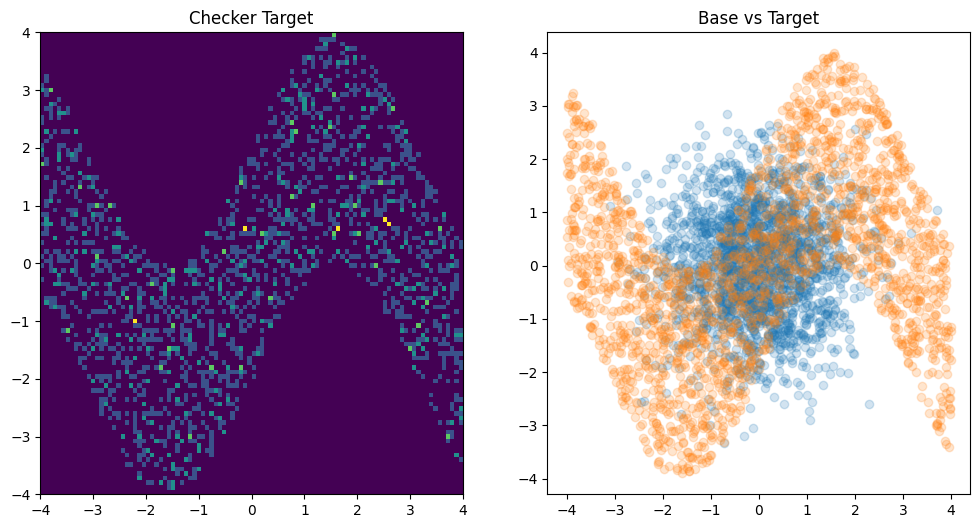

Target Batch Shape: (2000, 2)
Base Batch Shape: (2000, 2)


In [102]:

class Prior(torch.nn.Module):
    def forward(self, batch_size):
        raise NotImplementedError()
    def log_prob(self, x):
        raise NotImplementedError()
    def draw(self, batch_size):
        return self.forward(batch_size)

class SimpleNormal(Prior):
    def __init__(self, loc, var, requires_grad=False):
        super().__init__()
        if requires_grad:
            loc.requires_grad_()
            var.requires_grad_()
        self.loc = loc
        self.var = var
        self.dist = torch.distributions.normal.Normal(
            torch.flatten(self.loc), torch.flatten(self.var))
        self.shape = loc.shape

    def log_prob(self, x):
        logp = self.dist.log_prob(x.reshape(x.shape[0], -1))
        return torch.sum(logp, dim=1)

    def forward(self, batch_size):
        x = self.dist.sample((batch_size,))
        return torch.reshape(x, (-1,) + self.shape)

    def rsample(self, batch_size):
        x = self.dist.rsample((batch_size,))
        return torch.reshape(x, (-1,) + self.shape)

def target(bs):
    x1 = torch.rand(bs) * 4 - 2
    x2_ = torch.rand(bs) * 4 - 2
    x2 = 1/2*x2_ + torch.sin(x1 * 2)
    return torch.cat([x1[:, None], x2[:, None]], 1) * 2




def grab(var):
    return var.detach().cpu().numpy()

class SampleDataset(Dataset):
    def __init__(self, distribution, size):
        self.distribution = distribution
        self.size = size

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        return self.distribution(1).squeeze(0)


ndim = 2
batch_size = 2000
dataset_size = 20000


target_distribution = target
base_distribution = SimpleNormal(torch.zeros(ndim), torch.ones(ndim))


target_dataset = SampleDataset(target_distribution, dataset_size)
base_dataset = SampleDataset(base_distribution, dataset_size)


target_loader = DataLoader(target_dataset, batch_size=batch_size, shuffle=True)
base_loader = DataLoader(base_dataset, batch_size=batch_size, shuffle=True)

target_samples = next(iter(target_loader)).numpy()
base_samples = next(iter(base_loader)).numpy()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist2d(target_samples[:, 0], target_samples[:, 1], bins=100, range=[[-4, 4], [-4, 4]])
ax[0].set_title("Checker Target")

ax[1].scatter(base_samples[:, 0], base_samples[:, 1], label='base', alpha=0.2)
ax[1].scatter(target_samples[:, 0], target_samples[:, 1], alpha=0.2)
ax[1].set_title("Base vs Target")

plt.show()

print("Target Batch Shape:", target_samples.shape)
print("Base Batch Shape:", base_samples.shape)


In [103]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



class FullyConnectedModel(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim, time_embed_dim):
        super(FullyConnectedModel, self).__init__()
        self.time_embed = nn.Linear(1, time_embed_dim)
        layers = []
        prev_dim = input_dim + time_embed_dim
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim
        layers.append(nn.Linear(prev_dim, output_dim))
        self.network = nn.Sequential(*layers)

    def forward(self, x, t):
        t_embed = self.time_embed(t.unsqueeze(-1))
        x = x.view(x.size(0), -1)
        t_embed = t_embed.expand(x.size(0), -1)
        x = torch.cat([x, t_embed], dim=-1)
        return self.network(x)

base_lr      = 2e-3
hidden_sizes = [256, 256, 256, 256]
in_size      = (ndim+1)
out_size     = (ndim)
inner_act    = 'relu'
final_act    = 'none'
print_model  = False


bs = 2000

epochs = 50
steps = 100
t_values = torch.linspace(0, 1, steps, device=device)
path = 'one-sided-linear'
interpolant  = Interpolant(path=path, gamma_type='brownian')
ndim = 2
hidden_dims = [256, 256, 256,256]
time_embed_dim = 20
batch_size = 2000
b = FullyConnectedModel(input_dim=ndim, hidden_dims=hidden_dims, output_dim=ndim, time_embed_dim=time_embed_dim).to(device)
eta = FullyConnectedModel(input_dim=ndim, hidden_dims=hidden_dims, output_dim=ndim, time_embed_dim=time_embed_dim).to(device)

opt_b     = torch.optim.Adam(  b.parameters(), lr=base_lr)
opt_eta   = torch.optim.Adam(eta.parameters(), lr=base_lr)
sched_b   = torch.optim.lr_scheduler.StepLR(optimizer=  opt_b, step_size=1500, gamma=0.4)
sched_eta = torch.optim.lr_scheduler.StepLR(optimizer=opt_eta, step_size=1500, gamma=0.4)




tensor([0.])


In [105]:

epochs=50
for epoch in range(epochs):
    b.train()
    eta.train()
    for x1 in target_loader:
        x1 = x1.to(device)
        x0 = base_distribution(x1.shape[0]).to(device)
        ts  = torch.rand(size=(x1.shape[0],)).to(device)
        loss_b = make_loss(loss_per_sample_b_one_sided, b,  x0, x1, ts, interpolant)
        loss_eta = make_loss(loss_per_sample_one_sided_eta, eta, x0, x1, ts, interpolant)
        loss = loss_b + loss_eta
        opt_b.zero_grad()
        opt_eta.zero_grad()
        loss_b.backward()
        loss_eta.backward()
        opt_b.step()
        opt_eta.step()
        sched_b.step()
        sched_eta.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')




torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
Epoch 1/50, Loss: -2.3053886890411377
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000,

KeyboardInterrupt: 

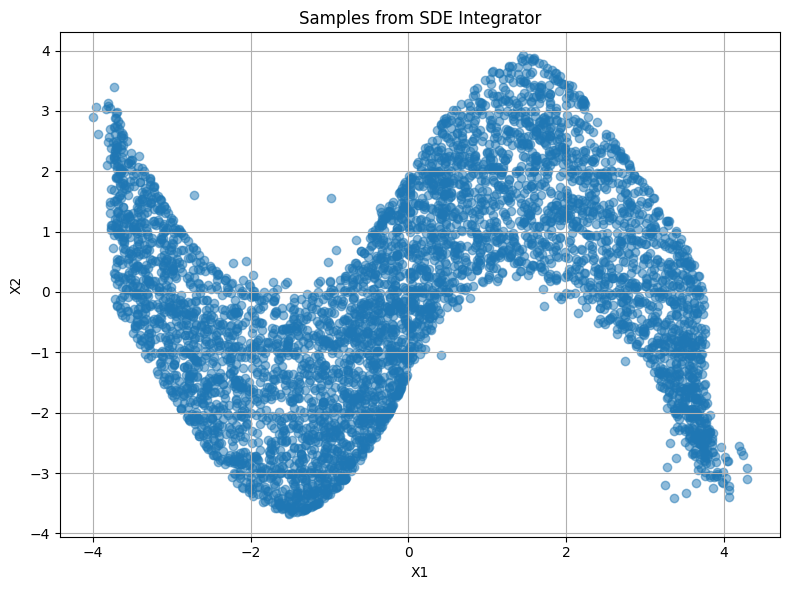

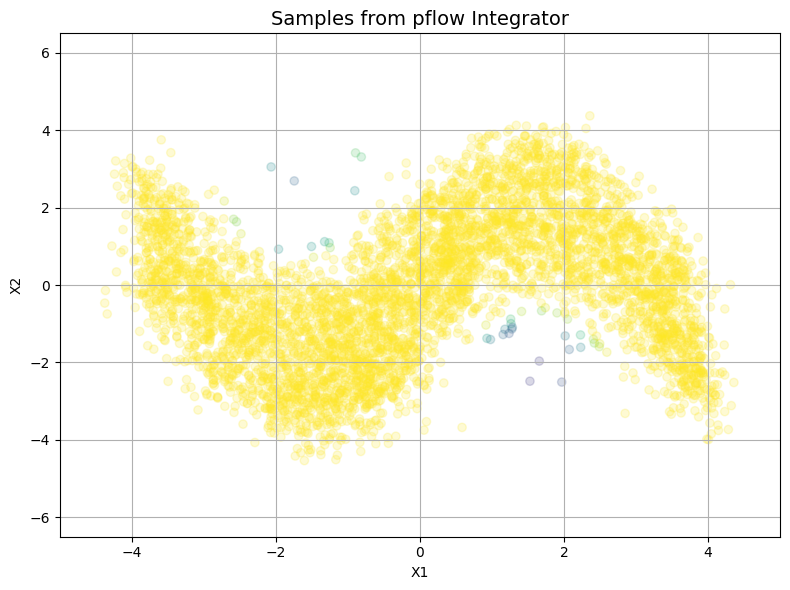

In [59]:
s = SFromEta(eta, interpolant.a)

sde_flow = SDEIntegrator(b=b, s=s, eps=torch.tensor(0.1), n_save=4, start_end=(0.0001, 0.999), n_step=100).to(device)
pflow = PFlowIntegrator(b=b,  method='dopri5', interpolant=interpolant, n_step=3)
bs = 5000
with torch.no_grad():
    x0_tests = base_distribution(bs).to(device)
    xfs_sde = sde_flow.rollout_forward(x0_tests, 'heun')
    xf_sde = grab(xfs_sde[-1].squeeze())

    xfs_pflow, dlogp_pflow = pflow.rollout(x0_tests)
    xf_pflow = grab(xfs_pflow[-1].squeeze())

    x0_tests=x0_tests.cpu()
    logp0 = base_distribution.log_prob(x0_tests)

    logpx_pflow = grab( + dlogp_pflow[-1].squeeze())




plt.figure(figsize=(8, 6))
plt.scatter(xf_sde[:, 0], xf_sde[:, 1], alpha=0.5)
plt.title('Samples from SDE Integrator')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(
    xf_pflow[:, 0], xf_pflow[:, 1],
    c=grab(torch.exp(torch.tensor(logpx_pflow))),
    vmin=0.0, vmax=0.05, alpha=0.2
)
plt.xlim(-5, 5)
plt.ylim(-6.5, 6.5)
plt.title('Samples from pflow Integrator', fontsize=14)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()

two sided

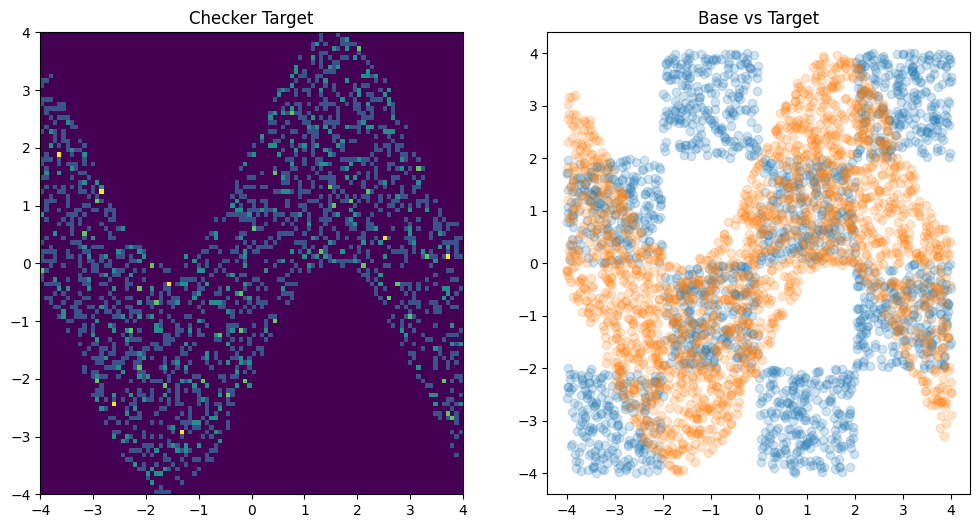

Target Batch Shape: (2000, 2)
Base Batch Shape: (2000, 2)


In [106]:

class Prior(torch.nn.Module):
    def forward(self, batch_size):
        raise NotImplementedError()
    def log_prob(self, x):
        raise NotImplementedError()
    def draw(self, batch_size):
        return self.forward(batch_size)


def init(bs):
    x1 = torch.rand(bs) * 4 - 2
    x2_ = torch.rand(bs) - torch.randint(2, (bs,)) * 2
    x2 = x2_ + (torch.floor(x1) % 2)
    return (torch.cat([x1[:, None], x2[:, None]], 1) * 2)



def target(bs):
    x1 = torch.rand(bs) * 4 - 2
    x2_ = torch.rand(bs) * 4 - 2
    x2 = 1/2*x2_ + torch.sin(x1 * 2)
    return torch.cat([x1[:, None], x2[:, None]], 1) * 2




def grab(var):
    return var.detach().cpu().numpy()

class SampleDataset(Dataset):
    def __init__(self, distribution, size):
        self.distribution = distribution
        self.size = size

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        return self.distribution(1).squeeze(0)


ndim = 2
batch_size = 2000
dataset_size = 20000


target_distribution = target
base_distribution = init

target_dataset = SampleDataset(target_distribution, dataset_size)
base_dataset = SampleDataset(base_distribution, dataset_size)

target_loader = DataLoader(target_dataset, batch_size=batch_size, shuffle=True)
base_loader = DataLoader(base_dataset, batch_size=batch_size, shuffle=True)

target_samples = next(iter(target_loader)).numpy()
base_samples = next(iter(base_loader)).numpy()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist2d(target_samples[:, 0], target_samples[:, 1], bins=100, range=[[-4, 4], [-4, 4]])
ax[0].set_title("Checker Target")

ax[1].scatter(base_samples[:, 0], base_samples[:, 1], label='base', alpha=0.2)
ax[1].scatter(target_samples[:, 0], target_samples[:, 1], alpha=0.2)
ax[1].set_title("Base vs Target")

plt.show()

print("Target Batch Shape:", target_samples.shape)
print("Base Batch Shape:", base_samples.shape)


In [107]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")




base_lr      = 2e-3
bs = 2000

epochs = 50
steps = 100
t_values = torch.linspace(0, 1, steps, device=device)
path = 'linear'
interpolant  = Interpolant(path=path, gamma_type='brownian')
print(interpolant.gamma(torch.tensor(0.3)))
ndim = 2
hidden_dims = [256, 256, 256,256]
time_embed_dim = 20
batch_size = 2000
b = FullyConnectedModel(input_dim=ndim, hidden_dims=hidden_dims, output_dim=ndim, time_embed_dim=time_embed_dim).to(device)
eta = FullyConnectedModel(input_dim=ndim, hidden_dims=hidden_dims, output_dim=ndim, time_embed_dim=time_embed_dim).to(device)

opt_b     = torch.optim.Adam(  b.parameters(), lr=base_lr)
opt_eta   = torch.optim.Adam(eta.parameters(), lr=base_lr)
sched_b   = torch.optim.lr_scheduler.StepLR(optimizer=  opt_b, step_size=1500, gamma=0.4)
sched_eta = torch.optim.lr_scheduler.StepLR(optimizer=opt_eta, step_size=1500, gamma=0.4)




tensor(0.4583)


In [108]:

epochs=50
for epoch in range(epochs):
    b.train()
    eta.train()
    for x1 in target_loader:
        x1 = x1.to(device)
        x0 = base_distribution(x1.shape[0]).to(device)
        ts  = torch.rand(size=(x1.shape[0],)).to(device)
        loss_b = make_loss(loss_per_sample_b, b,  x0, x1, ts, interpolant)
        loss_eta = make_loss(loss_per_sample_eta, eta, x0, x1, ts, interpolant)
        loss = loss_b + loss_eta
        opt_b.zero_grad()
        opt_eta.zero_grad()
        loss_b.backward()
        loss_eta.backward()
        opt_b.step()
        opt_eta.step()
        sched_b.step()
        sched_eta.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')




torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
Epoch 1/50, Loss: -1.5553053617477417
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000, 2])
torch.Size([2000, 2])
torch.Size([2000])
torch.Size([2000,

KeyboardInterrupt: 

(5000, 2)


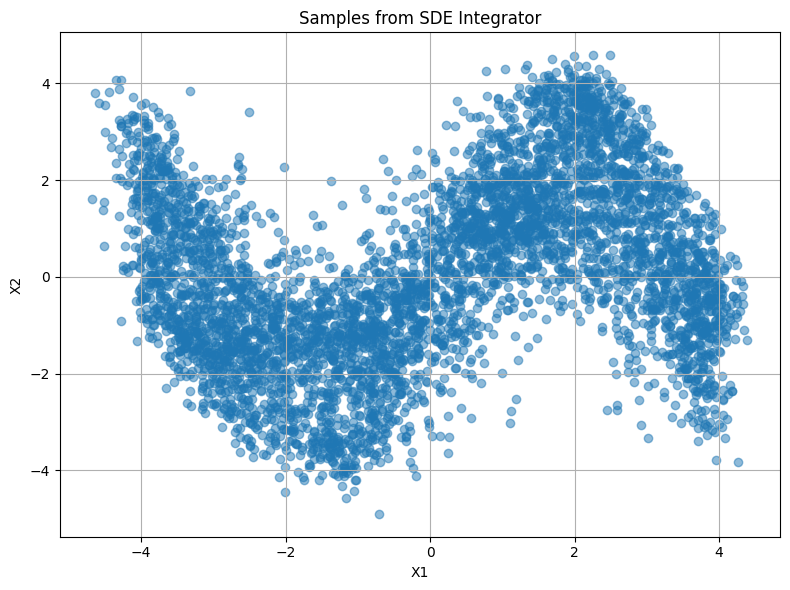

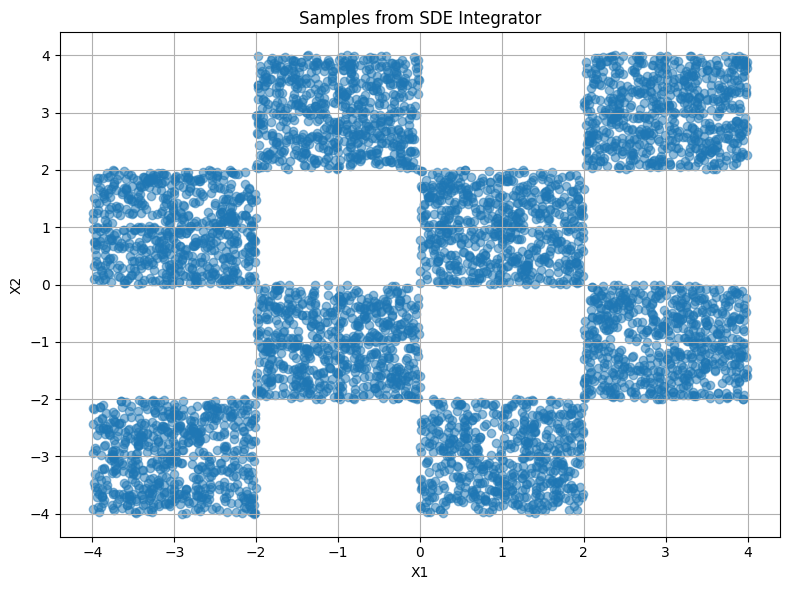

(5000, 2)


In [17]:
s = SFromEta(eta, interpolant.gamma)

sde_flow = SDEIntegrator(b=b, s=s, eps=torch.tensor(0.1), n_save=4, start_end=(0.0001, 0.999), n_step=100).to(device)
bs = 5000
with torch.no_grad():
    x0_tests  = base_distribution(bs).to(device)
    xfs_sde   = sde_flow.rollout_forward(x0_tests, 'heun')
    xf_sde    = grab(xfs_sde[-1].squeeze())
    x0=grab(x0_tests.squeeze())
    print(xf_sde.shape)

plt.figure(figsize=(8, 6))
plt.scatter(xf_sde[:, 0], xf_sde[:, 1], alpha=0.5)
plt.title('Samples from SDE Integrator')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(x0[:, 0], x0[:, 1], alpha=0.5)
plt.title('Samples from SDE Integrator')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()
print(xf_sde.shape)


(5000, 2)
(5000, 2)


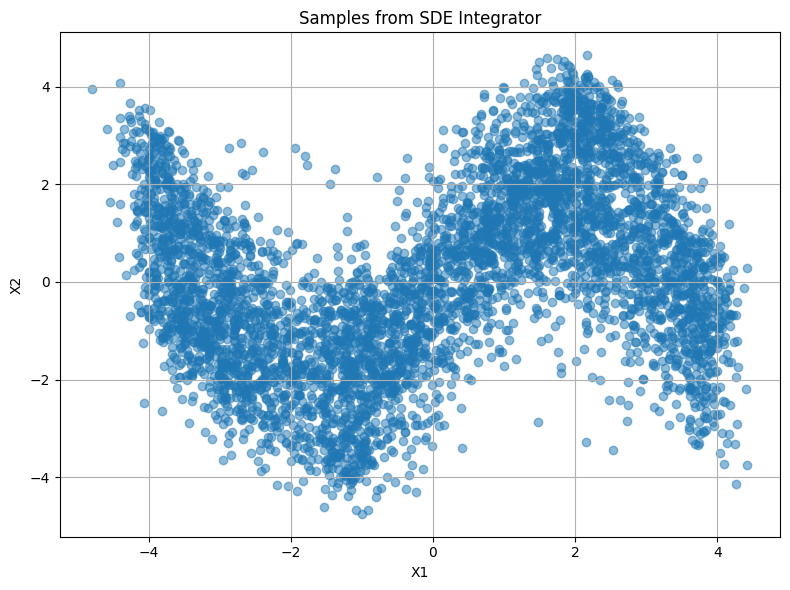

(5000, 2)


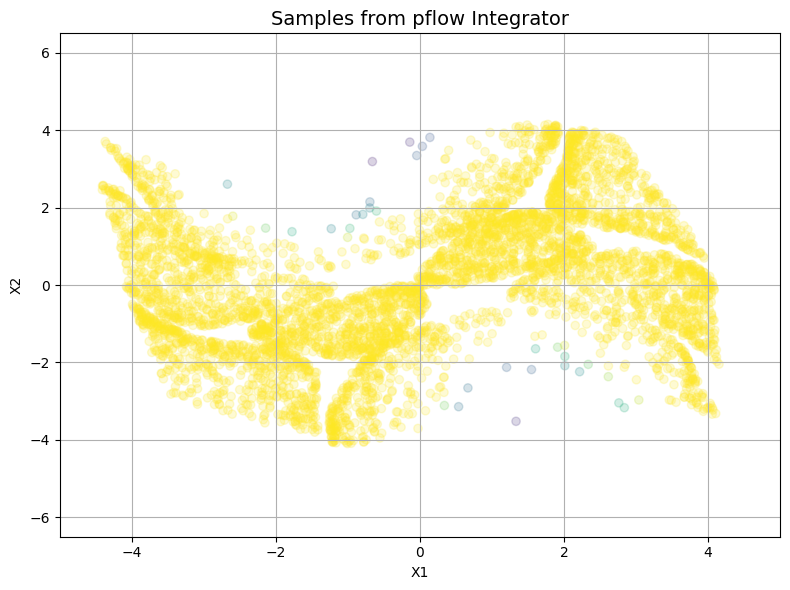

In [23]:
s = SFromEta(eta, interpolant.gamma)

sde_flow = SDEIntegrator(b=b, s=s, eps=torch.tensor(0.1), n_save=4, start_end=(0.0001, 0.999), n_step=100).to(device)
pflow = PFlowIntegrator(b=b,  method='dopri5', interpolant=interpolant, n_step=3)
bs = 5000
with torch.no_grad():
    x0_tests  = base_distribution(bs).to(device)
    xfs_sde   = sde_flow.rollout_forward(x0_tests, 'heun')
    xf_sde    = grab(xfs_sde[-1].squeeze())

    print(xf_sde.shape)
    xfs_pflow, dlogp_pflow = pflow.rollout(x0_tests)
    xf_pflow               = grab(xfs_pflow[-1].squeeze())
    print(xf_pflow.shape)

plt.figure(figsize=(8, 6))
plt.scatter(xf_sde[:, 0], xf_sde[:, 1], alpha=0.5)
plt.title('Samples from SDE Integrator')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()
print(xf_sde.shape)

plt.figure(figsize=(8, 6))
plt.scatter(
    xf_pflow[:, 0], xf_pflow[:, 1],
    c=grab(torch.exp(dlogp_pflow[-1].squeeze()).detach()),
    vmin=0.0, vmax=0.05, alpha=0.2
)
plt.xlim(-5, 5)
plt.ylim(-6.5, 6.5)
plt.title('Samples from pflow Integrator', fontsize=14)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()